In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving resampled_data_allactions_train.csv to resampled_data_allactions_train.csv
User uploaded file "resampled_data_allactions_train.csv" with length 691778 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving resampled_data_allactions_test.csv to resampled_data_allactions_test.csv
User uploaded file "resampled_data_allactions_test.csv" with length 161936 bytes


# Non-linear data example

## Human Fall Detection

- Taken from https://archive.ics.uci.edu/dataset/196/localization+data+for+person+activity
- Measures X,Y,Z position of Chest, Belt, Ankles

## Actions
- Walking, Sitting, Lying, getting up, sitting down, ..., Falling
- Set the Target to 1 if Falling, 0 otherwise

### Walking example

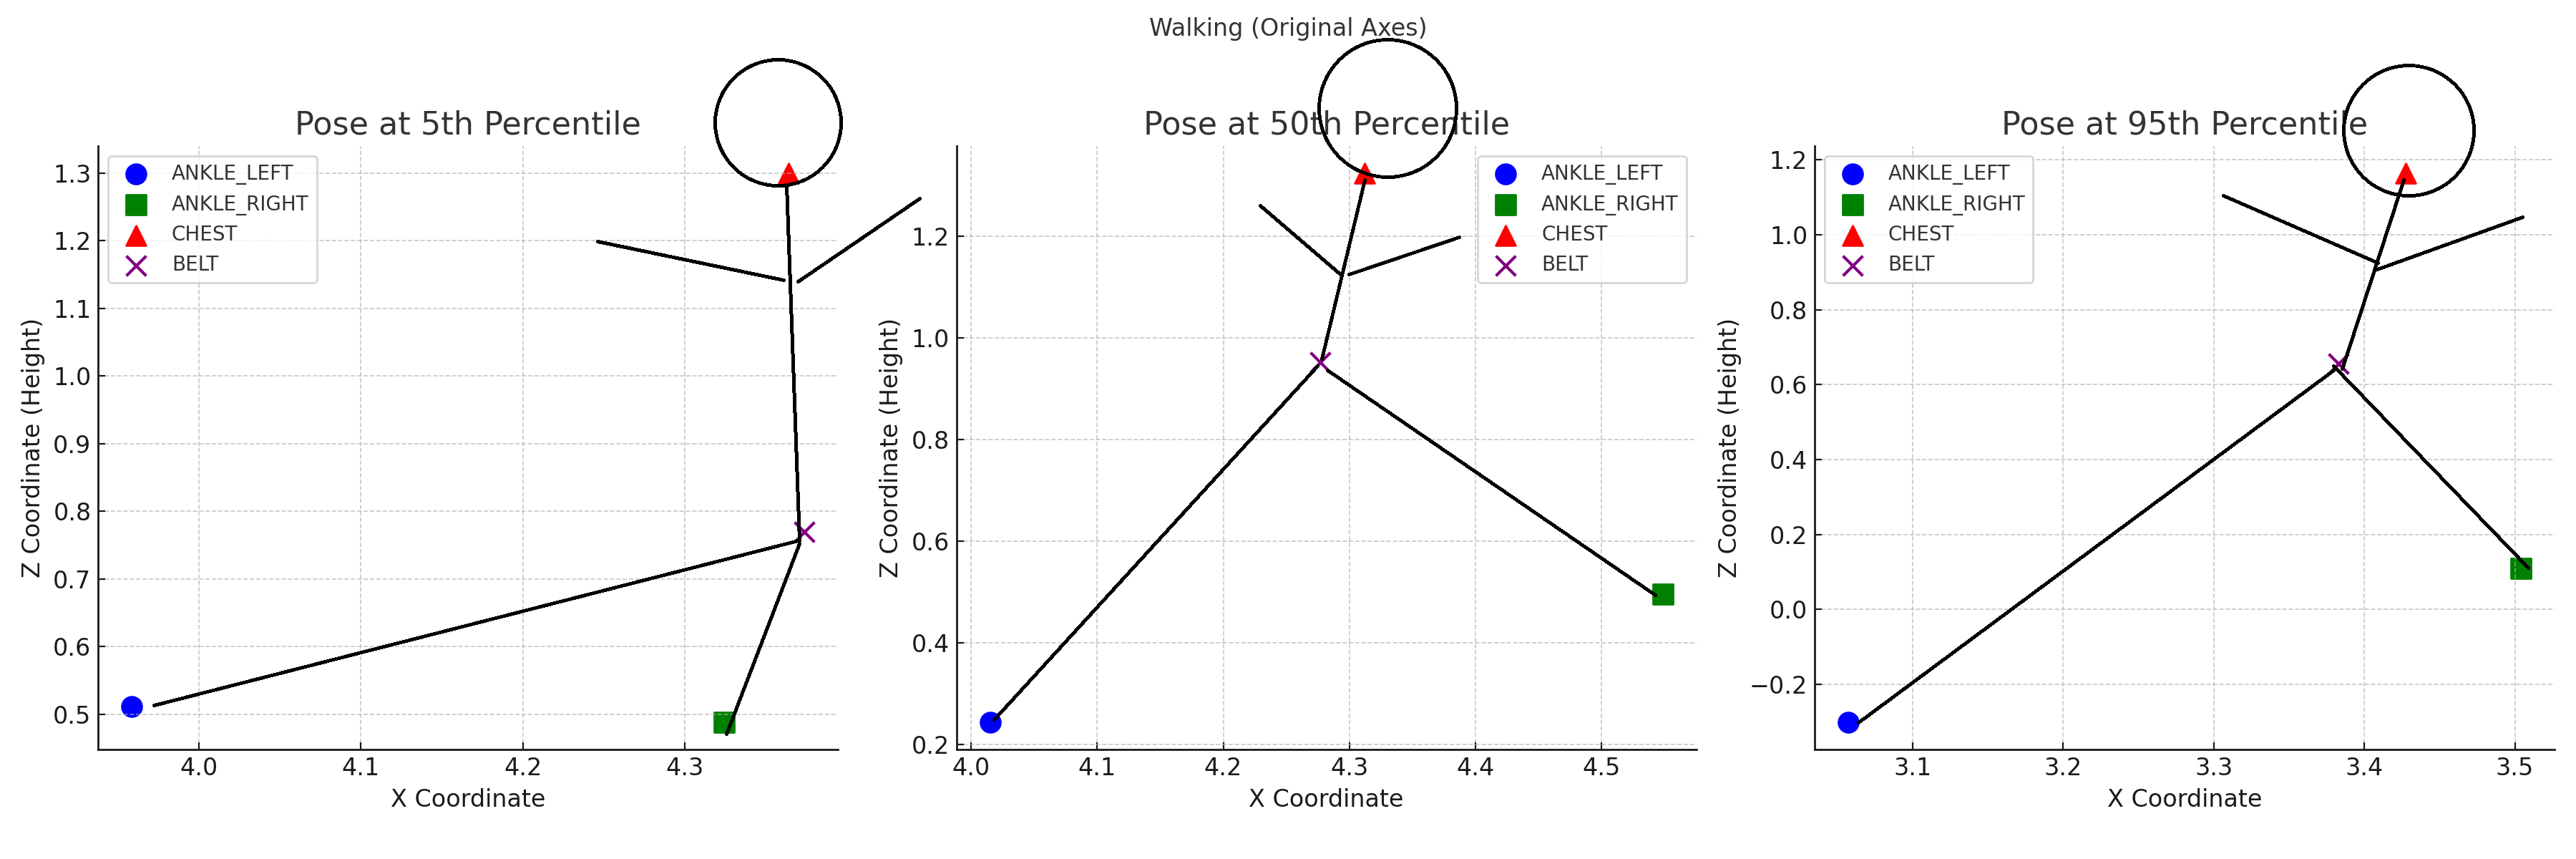

### Fall Down Example

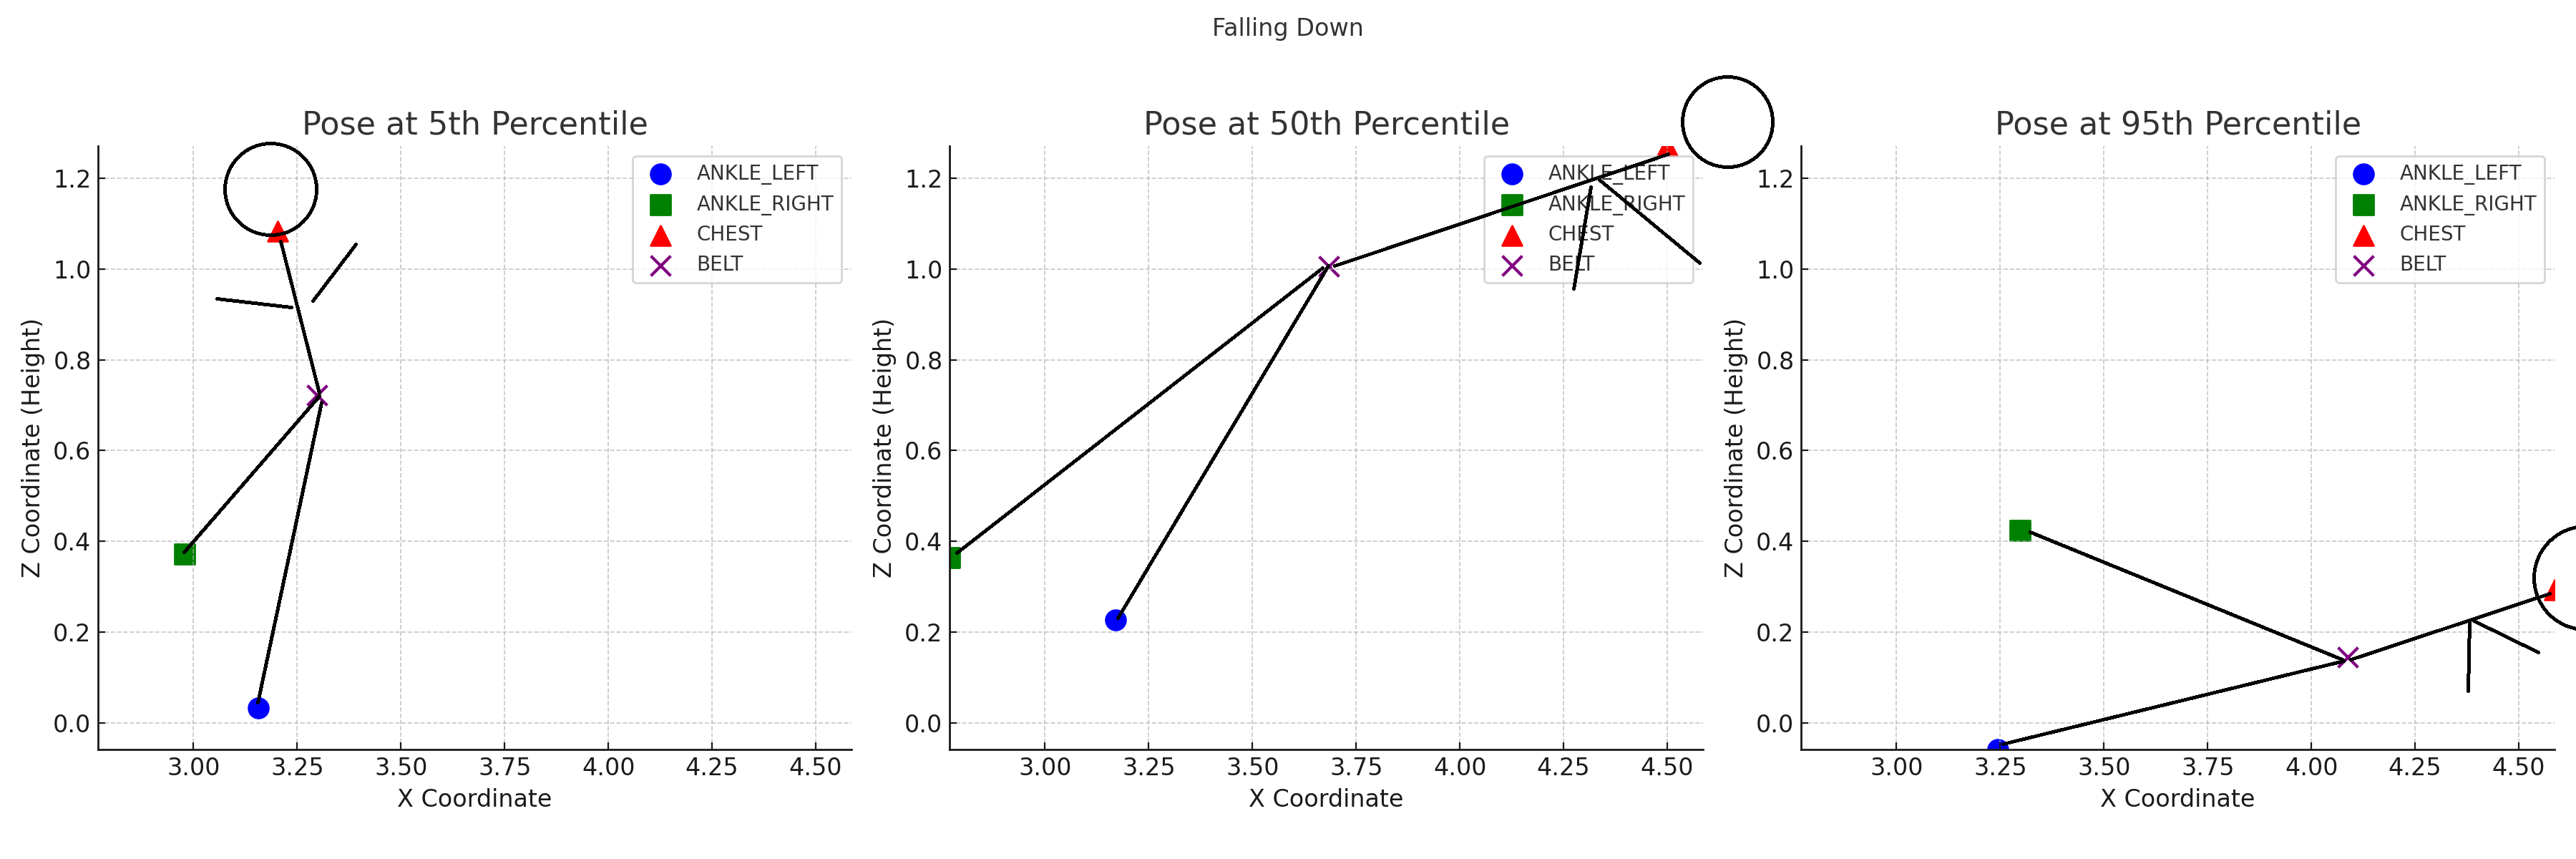

# SVM

In [ ]:
import pandas as pd

# Load the training and test datasets
train_path = 'resampled_data_allactions_train.csv'
test_path = 'resampled_data_allactions_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the training dataset to understand its structure
train_data.head()


,ANKLE_LEFT_X_5,ANKLE_LEFT_Y_5,ANKLE_LEFT_Z_5,ANKLE_LEFT_X_50,ANKLE_LEFT_Y_50,ANKLE_LEFT_Z_50,ANKLE_LEFT_X_95,ANKLE_LEFT_Y_95,ANKLE_LEFT_Z_95,ANKLE_RIGHT_X_5,...,BELT_X_5,BELT_Y_5,BELT_Z_5,BELT_X_50,BELT_Y_50,BELT_Z_50,BELT_X_95,BELT_Y_95,BELT_Z_95,target
0,3.650526,1.637373,0.069115,3.830982,1.325786,0.331110,3.798245,1.209078,0.201697,3.846577,...,3.092255,1.128860,0.442913,3.278225,1.438380,0.285472,3.187416,1.502439,0.400000,0
1,2.438515,2.534130,0.445795,2.870946,2.265601,0.441418,2.548970,2.515546,0.558984,2.506165,...,1.712501,2.443617,0.626659,1.399858,2.094643,0.515499,1.470438,1.909300,0.347862,0
2,3.648455,1.281936,0.248565,3.477284,1.143606,0.126578,3.161945,1.359928,0.551603,2.855688,...,3.326636,1.242122,1.092880,3.226726,1.085659,0.653734,3.882244,1.395754,0.036078,1
3,2.531937,2.548474,0.562029,2.607010,2.458552,0.669128,2.887320,2.114247,0.320522,2.543081,...,1.712112,2.359712,0.456085,1.502517,2.383386,0.126123,1.684697,2.481538,0.191425,0
4,1.949862,1.650666,0.193118,2.498629,1.911561,0.311272,2.559681,2.152813,0.578960,2.143920,...,2.003967,2.257150,0.474898,2.014707,2.049744,0.294150,1.403474,2.561652,0.585376,0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into features and target labels for both training and test sets
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=1.0, kernel='poly')
svm_model_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_train_poly = svm_model_poly.predict(X_train)
y_pred_test_poly = svm_model_poly.predict(X_test)

train_accuracy_poly = accuracy_score(y_train, y_pred_train_poly)
test_accuracy_poly = accuracy_score(y_test, y_pred_test_poly)

train_accuracy_poly, test_accuracy_poly


(0.9832347140039448, 0.95)

In [1]:
from sklearn.metrics import f1_score, classification_report

# Compute F1-scores for the polynomial kernel model
f1_train_poly = f1_score(y_train, y_pred_train_poly, average=None)
f1_test_poly = f1_score(y_test, y_pred_test_poly, average=None)

# Generate a classification report for test data
classification_rep_poly = classification_report(y_test, y_pred_test_poly)

# f1_train_poly, f1_test_poly,

print(classification_rep_poly)


NameError: ignored

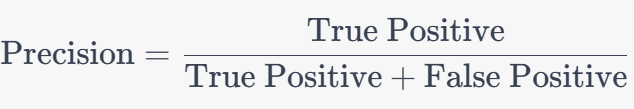

- Poor precision implies that a significant number of instances that the model predicts as positive actually belong to the negative class. - In other words, the model erroneously classifies negative instances as positive, leading to a **high rate of false positives**.

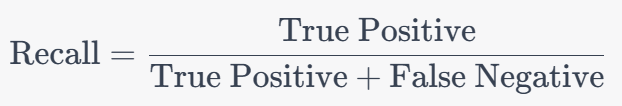

- Poor recall indicates that the model fails to identify a significant number of actual positive instances, leading to a **high rate of false negatives**.


# Finding C (tradeoff margin distance vs accuracy)


In [ ]:
import numpy as np

# Define the range of C values to be tested
C_values = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 250, 500, 1000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly')
    svm_model_loop.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred_train_loop = svm_model_loop.predict(X_train)
    y_pred_test_loop = svm_model_loop.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_pred_train_loop))
    test_accuracies.append(accuracy_score(y_test, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y_test, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df


,C_value,Train_Accuracy,Test_Accuracy,F1_Score_Class1
0,0.1,0.966469,0.929167,0.711864
1,0.5,0.974359,0.941667,0.750000
2,1.0,0.983235,0.950000,0.777778
3,2.0,0.986193,0.966667,0.840000
4,3.0,0.989152,0.966667,0.840000
5,4.0,0.990138,0.970833,0.857143
6,5.0,0.991124,0.975000,0.875000
7,6.0,0.994083,0.970833,0.857143
8,7.0,0.994083,0.970833,0.857143
9,8.0,0.994083,0.970833,0.857143


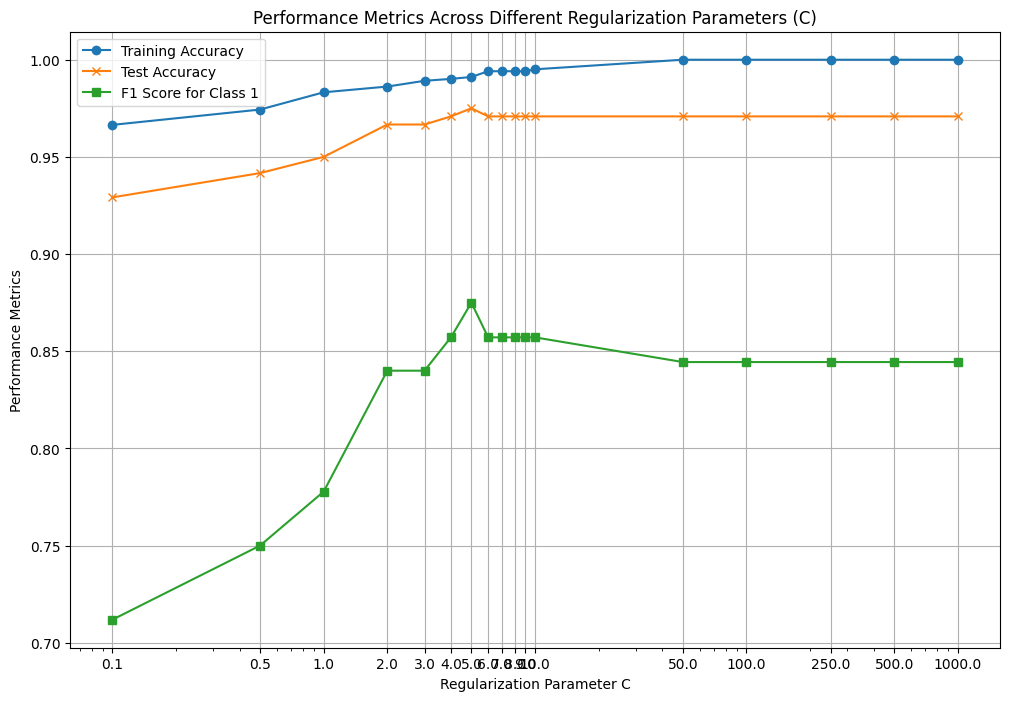

In [ ]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Train_Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='x', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='s', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# How are the boundaries being drawn
- plot the data on two axes
- see the distribution of predicted target labels

# Try a more flexible kernel

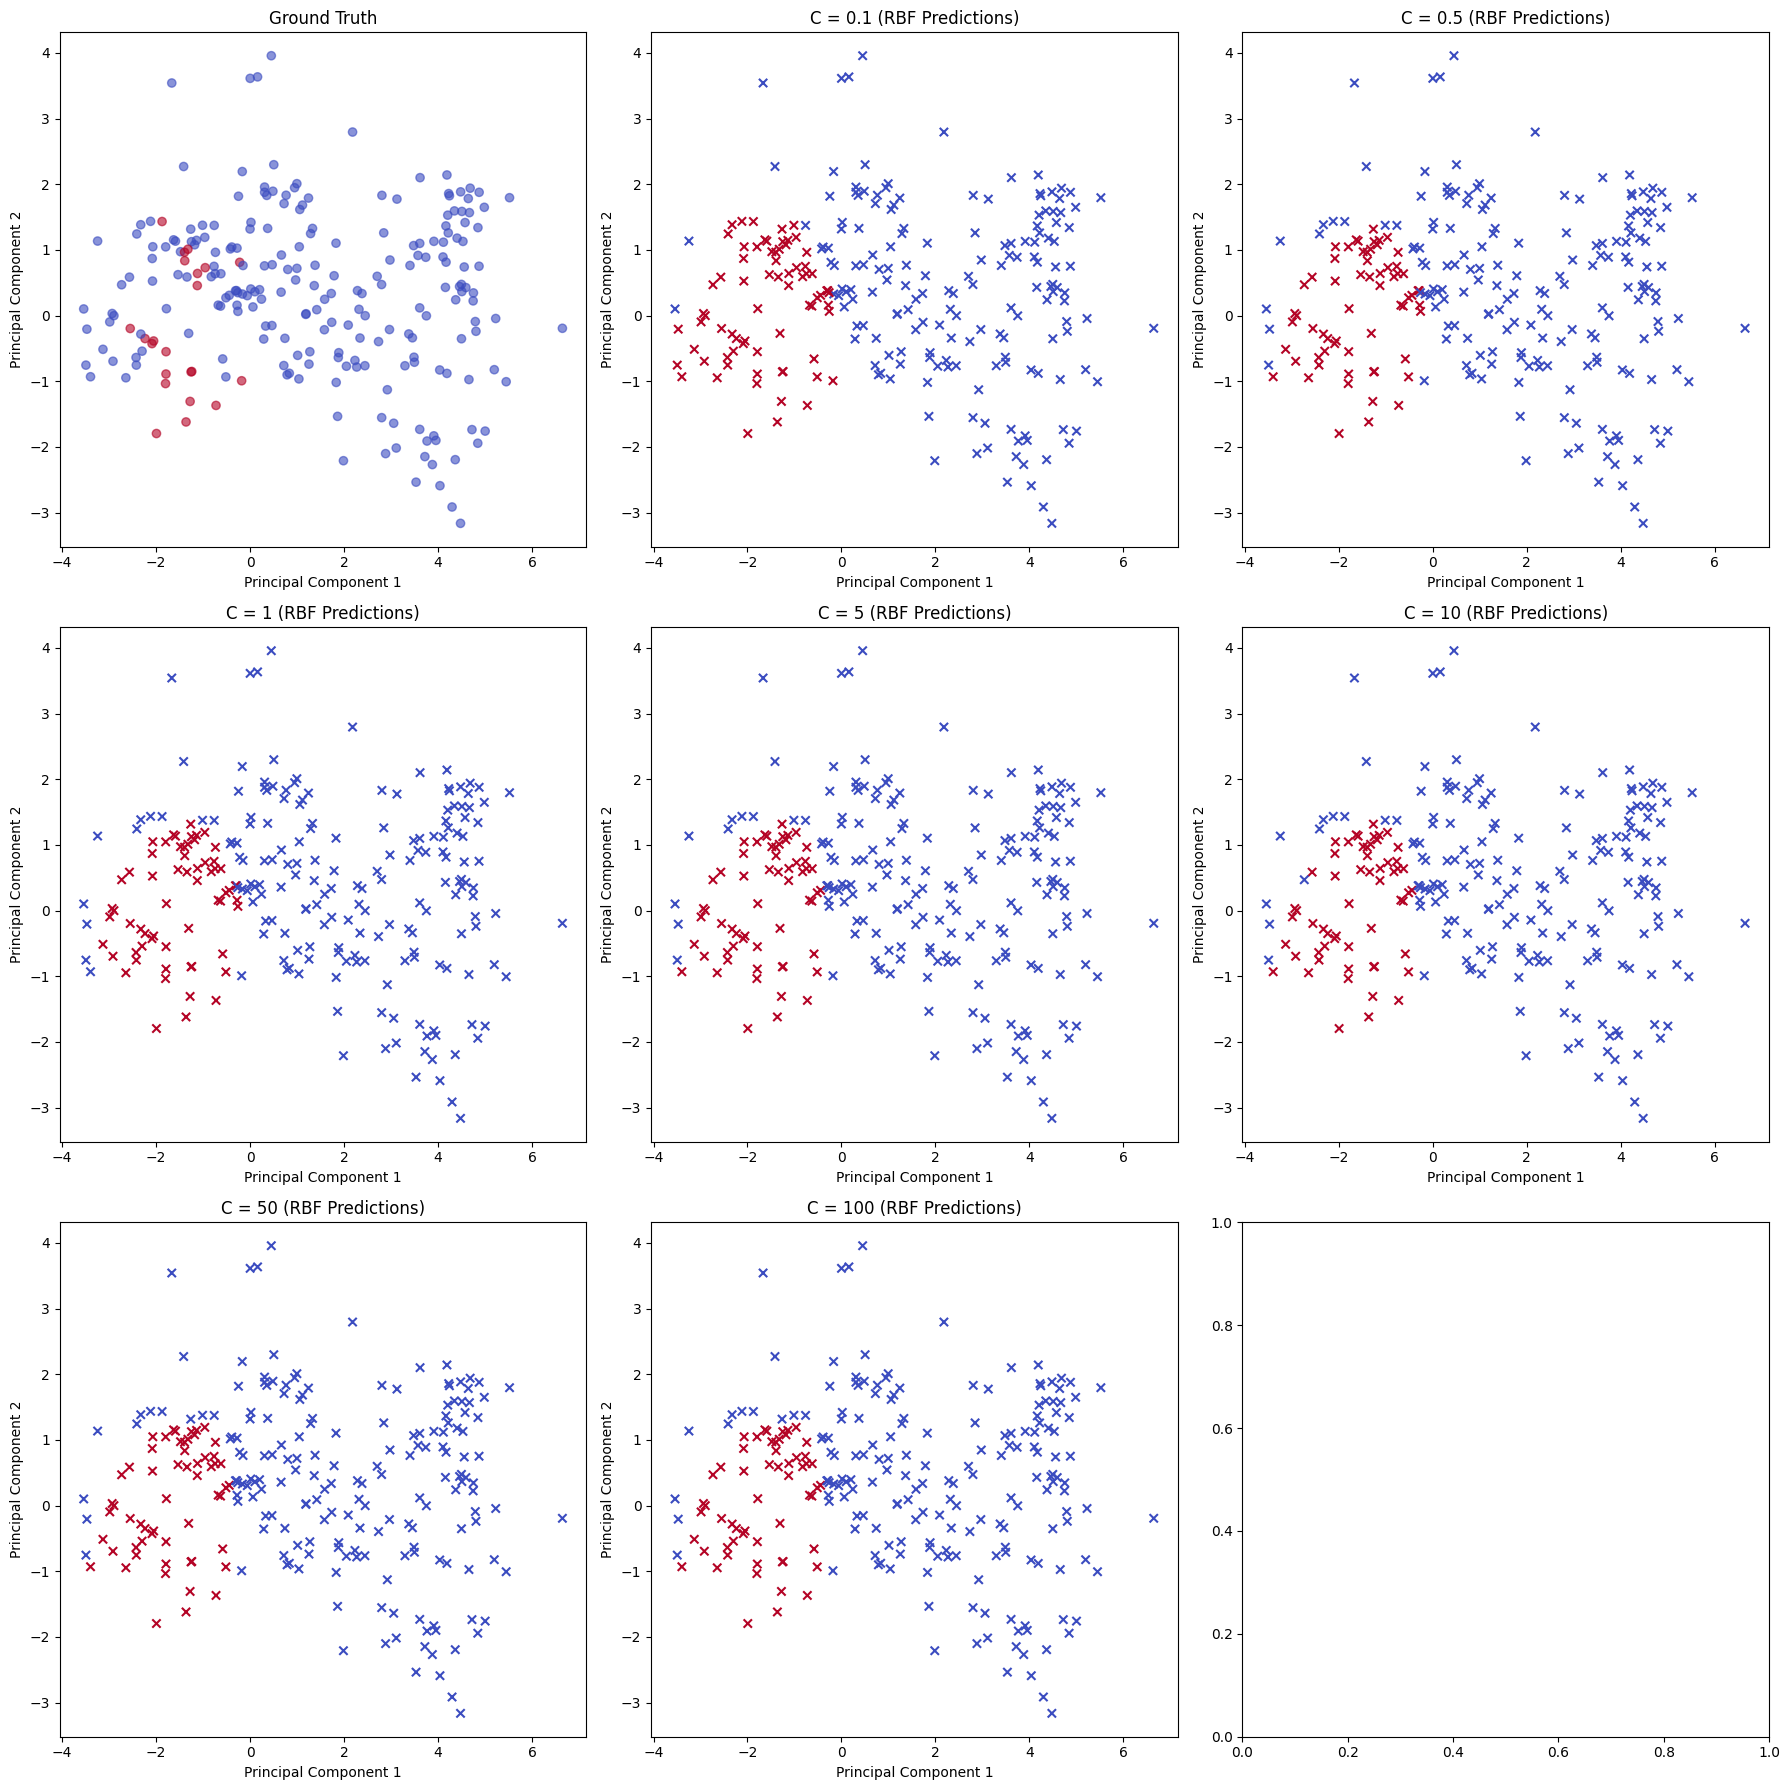

In [ ]:
# Initialize the plot with 8 subplots (1 for ground truth + 7 for different C-values)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Scatter plot for the ground truth in the first subplot
ax = axes.flatten()[0]
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='o', alpha=0.6)
ax.set_title('Ground Truth')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Loop over selected values of C and plot the predictions in remaining subplots
for i, C in enumerate([0.1, 0.5, 1, 5, 10, 50, 100], start=1):
    # Initialize and train the SVM model with C and RBF kernel on PCA-transformed data
    svm_model_pca_rbf = SVC(C=C, kernel='rbf')
    svm_model_pca_rbf.fit(X_train_pca, y_train)

    # Predictions on the test set
    y_pred_pca_rbf = svm_model_pca_rbf.predict(X_test_pca)

    # Determine the axis for this subplot
    ax = axes.flatten()[i]

    # Scatter plot for the predictions
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca_rbf, cmap='coolwarm', marker='x')

    # Titles and labels
    ax.set_title(f'C = {C} (RBF Predictions)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Remove unused subplots
for i in range(len(C_values) + 1, 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()
